# Flight Price Bangladesh Prediction

Muh Amri Sidiq

## Introduction

The "Bangladesh Flight Fare Dataset" is a synthetic dataset comprising 57,000 flight records tailored to represent air travel scenarios originating from Bangladesh. This dataset simulates realistic flight fare dynamics, capturing key factors such as airline operations, airport specifics, travel classes, booking behaviors, and seasonal variations specific to Bangladesh’s aviation market. It is designed for researchers, data scientists, and analysts interested in flight fare prediction, travel pattern analysis, or machine learning/deep learning applications. By combining real-world inspired statistical distributions and aviation industry standards, this dataset provides a robust foundation for exploring flight economics in a South Asian context

## Install Library

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, make_scorer
import lightgbm as lgb
import optuna
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

## Load Data

In [2]:
%%time

flight = pd.read_csv('/kaggle/input/flight-price-dataset-of-bangladesh/Flight_Price_Dataset_of_Bangladesh.csv')

CPU times: user 243 ms, sys: 58.7 ms, total: 302 ms
Wall time: 462 ms


Check preview data

In [3]:
flight.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


Check missing values

In [4]:
print(flight.isnull().sum())

Airline                  0
Source                   0
Source Name              0
Destination              0
Destination Name         0
Departure Date & Time    0
Arrival Date & Time      0
Duration (hrs)           0
Stopovers                0
Aircraft Type            0
Class                    0
Booking Source           0
Base Fare (BDT)          0
Tax & Surcharge (BDT)    0
Total Fare (BDT)         0
Seasonality              0
Days Before Departure    0
dtype: int64


No have missing values, next step check duplicated data

In [5]:
print(flight.duplicated().sum())

0


No have duplicated data, next step check structure data

In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

We have 57.000 row and 17 column, for detail explain this bellow:

 - `Airline` : Name of the operating airline
 - `Source` : IATA code of departure airport
 - `Source Name` : Full name of departure airport
 - `Destination` : IATA code of arrival airport
 - `Destination Name` : Full name of arrival airport
 - `Departure Date & Time` : Departure timestamp
 - `Arrival Date & Time` : Arrival timestamp
 - `Duration (hrs)` : Flight duration in hours
 - `Stopovers` : Number of stops
 - `Aircraft Type` : Aircraft model
 - `Class` : Travel class
 - `Booking Source` : Booking method
 - `Base Fare (BDT)` : Base ticket price in Bangladeshi Taka
 - `Tax & Surcharge (BDT)` : Additional fees
 - `Total Fare (BDT)` : Final price
 - `Seasonality` : Travel season
 - `Days Before Departure`: Days between booking and departure

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to understand their main characteristics before applying machine learning models or statistical tests. EDA helps identify patterns, detect anomalies, check assumptions, and gain insights using visualizations and statistical methods

In [7]:
flight.describe()

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,3.994955,58899.556573,11448.238494,71030.316199,45.460579
std,4.094043,68840.614499,12124.344329,81769.199536,26.015657
min,0.500000,1600.975688,200.000000,1800.975688,1.000000
25%,1.003745,8856.316983,200.000000,9602.699787,23.000000
50%,2.644656,31615.996792,9450.940481,41307.544990,45.000000
75%,5.490104,85722.930389,17513.046160,103800.906963,68.000000
max,15.831719,449222.933770,73383.440066,558987.332444,90.000000


Insight: we can see high variance every feature in min and max

In [8]:
flight.describe(include = 'object')

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Stopovers,Aircraft Type,Class,Booking Source,Seasonality
count,57000,57000,57000,57000,57000,57000,57000,57000,57000,57000,57000,57000
unique,24,8,8,20,20,54126,56944,3,5,3,3,4
top,US-Bangla Airlines,CGP,"Shah Amanat International Airport, Chittagong",JED,"King Abdulaziz International Airport, Jeddah",2025-11-15 15:33:00,2025-12-10 21:54:33,Direct,Airbus A320,Economy,Direct Booking,Regular
freq,4496,7241,7241,3071,3071,4,2,36642,23970,19112,19111,44525


Insight: `Source` and `SourceName` has same meaning. `Destination` and `Destination Name` has same meaning. `Departure Date & Time` and `Arrival Date & Time` type data is object we must change to datet time

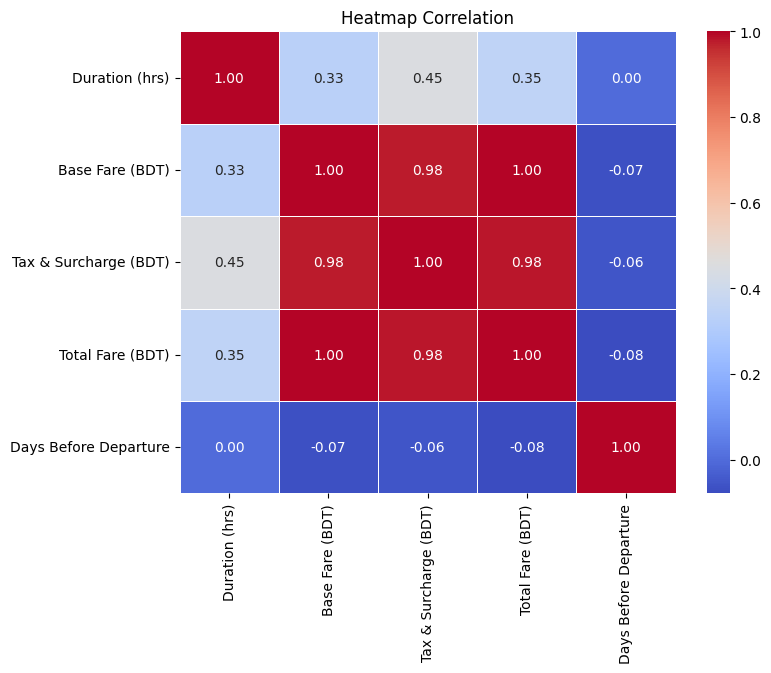

In [9]:
flight_numeric = flight.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = flight_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Correlation")
plt.show()

Insight: `Base Fare (BDT)` and `Tax & Surcharge (BDT)` have strong correlation to `Total Fare (BDT)`

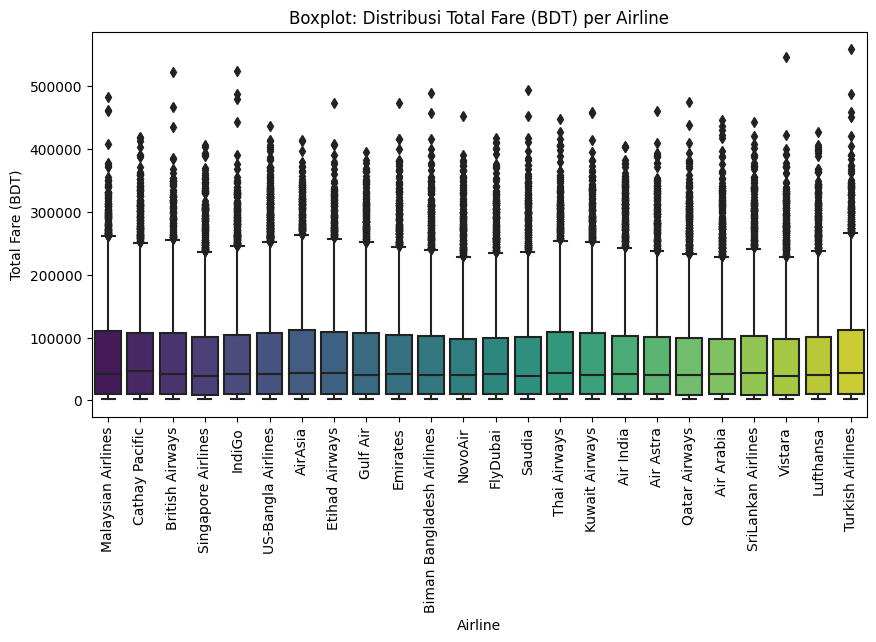

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Airline', y='Total Fare (BDT)', data=flight, palette="viridis")
plt.title("Boxplot: Distribusi Total Fare (BDT) per Airline")
plt.ylabel("Total Fare (BDT)")
plt.xticks(rotation=90)
plt.show()

Insight: `Airline` type Turkish Airline have Upper Quirtile and outliers `Total Fare (BDT)` higher than other

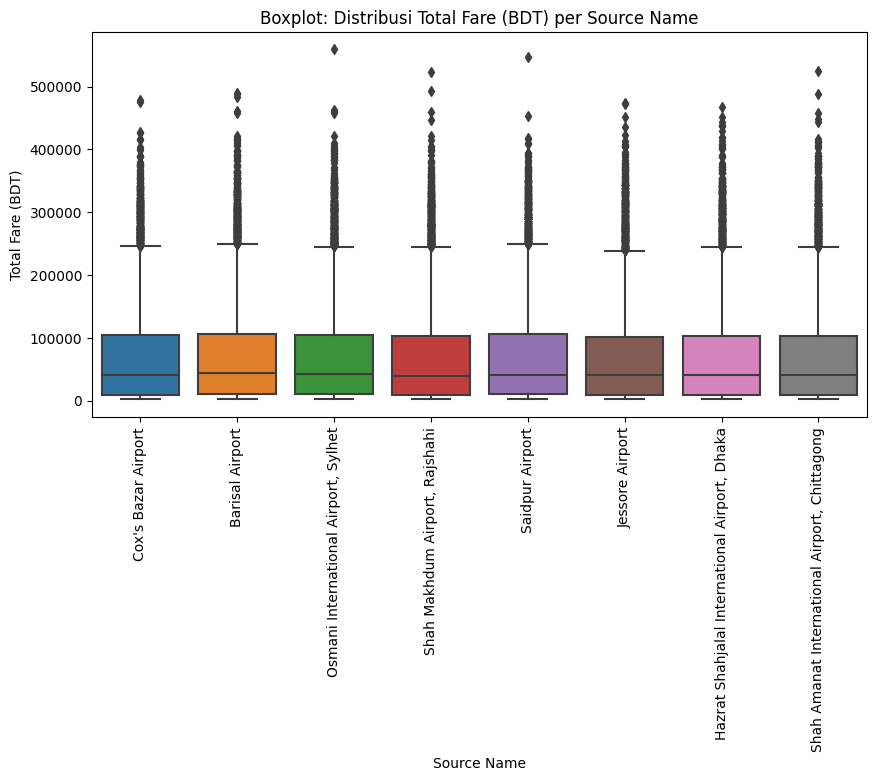

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Source Name', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Source Name")
plt.ylabel("Total Fare (BDT)")
plt.xticks(rotation=90)
plt.show()

Insight: All `Source Name` have outliers `Total Fare (BDT)`, highest `Total Fare (BDT)` with `Source Name` is Osmani International Airport, sylhet

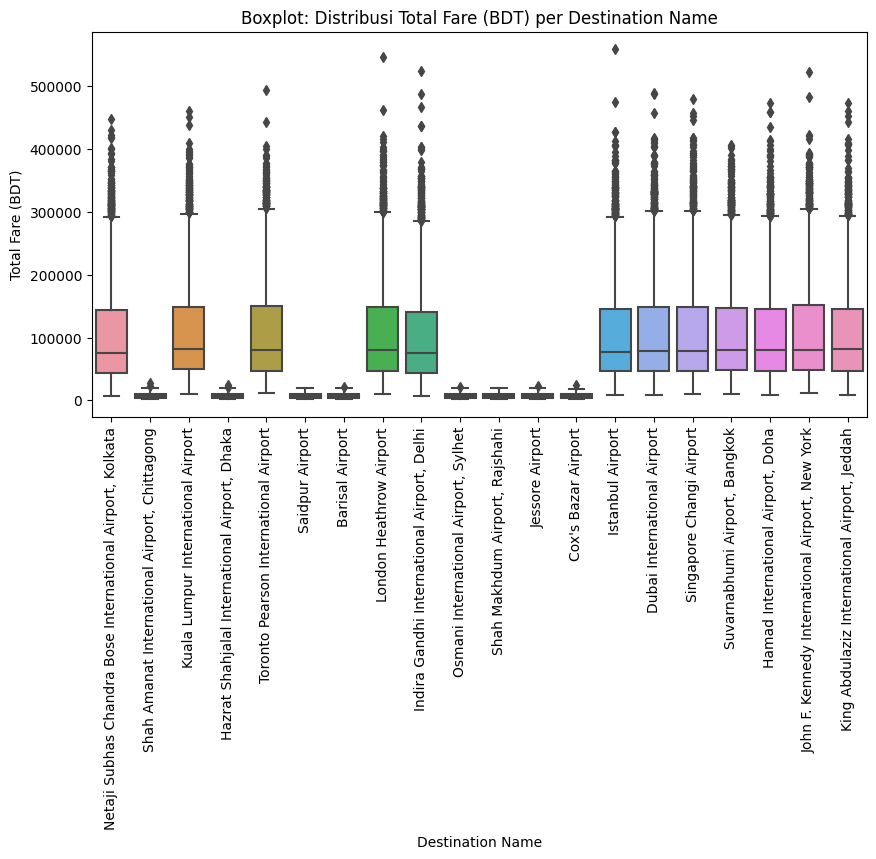

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Destination Name', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Destination Name")
plt.ylabel("Total Fare (BDT)")
plt.xticks(rotation=90)
plt.show()

Insight: 12 `Destination Name` have outliers `Total Fare (BDT)`

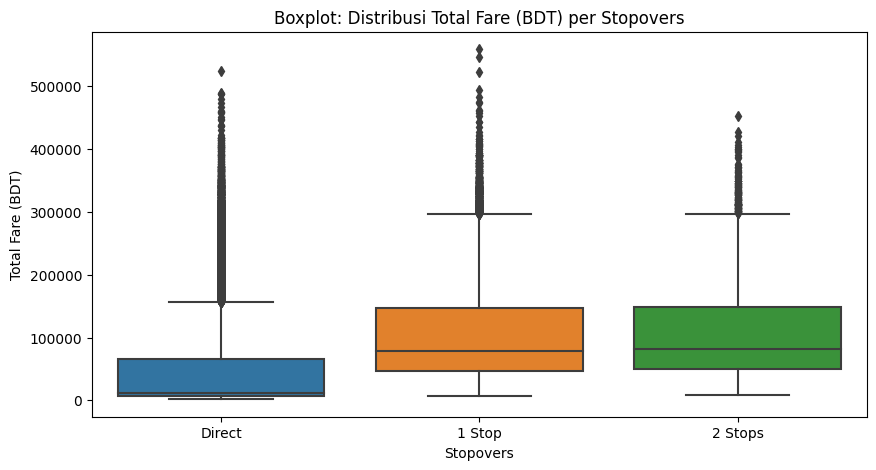

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Stopovers', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Stopovers")
plt.ylabel("Total Fare (BDT)")
plt.show()

Insight: `Stopovers` type direct have lowest median `Total Fare (BDT)` but outliers higher than `Stopovers` type 2 stop, `Stopovers` type 1 stop have outliers `Total Fare (BDT)` highest

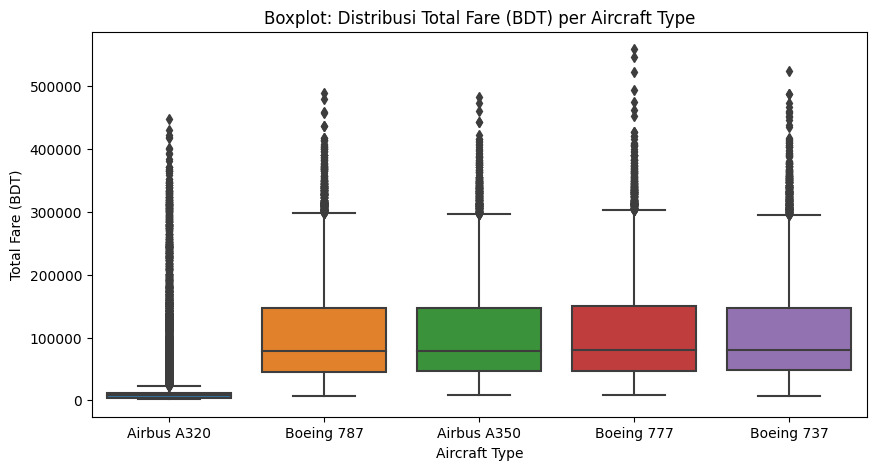

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Aircraft Type', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Aircraft Type")
plt.ylabel("Total Fare (BDT)")
plt.show()

Insight: All `Aircraft Type` have outliers `Total Fare (BDT)`, `Aircraft Type` Boeing 777 have highest Outliers `Total fare (BDT)`, only `Aircraft` type Airbus A320 have median and meand lowest than other

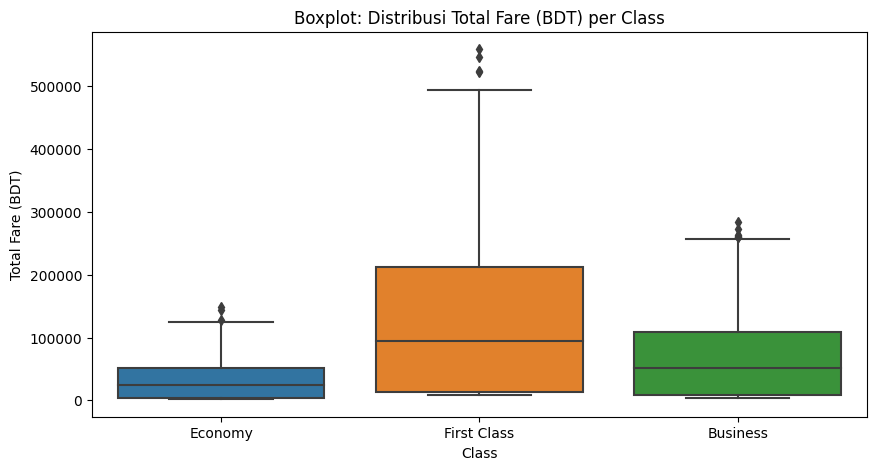

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Class")
plt.ylabel("Total Fare (BDT)")
plt.show()

Insight: `Class` type Firts Class have outliers, mean and median `Total Fare (BDT)` Highest. `Class` type Economy have median `Total Fare (BDT) lowest

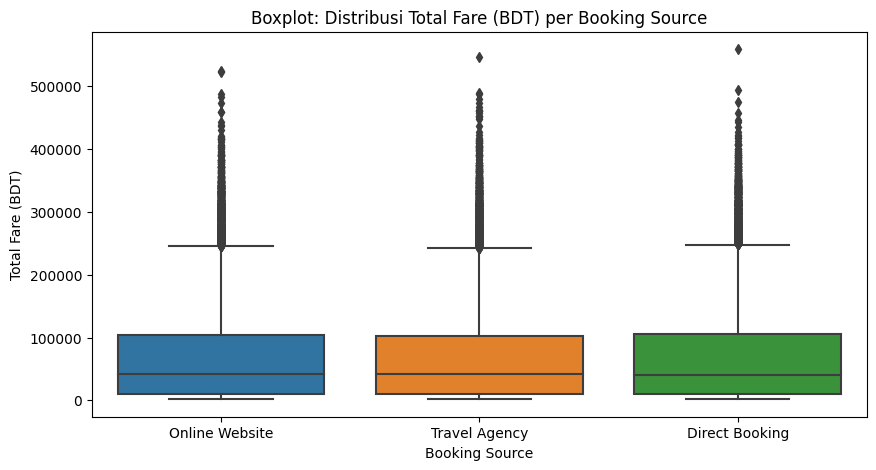

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Booking Source', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Booking Source")
plt.ylabel("Total Fare (BDT)")
plt.show()

Insight: All `Booking Source` have outliers `Total Fare (BDT)`

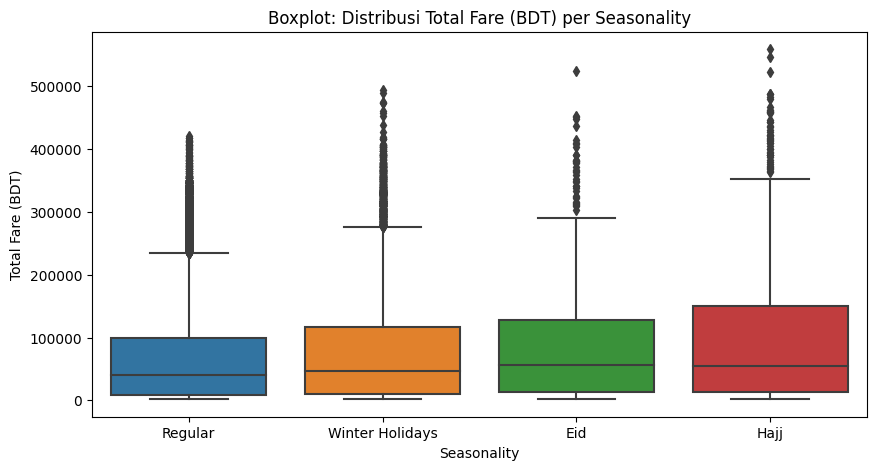

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Seasonality', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Seasonality")
plt.ylabel("Total Fare (BDT)")
plt.show()

Insight: `Seasonality` type Hajj have outliers `Total Fare (BDT)` Highest, and `Seasonality` type Reguler have median `Total Fare (BDT) lowest

## Feature Engineering

Extract Departure, Arrival Time, and Ratio

In [18]:
flight['Departure Date & Time'] = pd.to_datetime(flight['Departure Date & Time'])
flight['hour_dep'] = flight['Departure Date & Time'].dt.hour
flight['dow_dep'] = flight['Departure Date & Time'].dt.day_name()
flight['month_dep'] = flight['Departure Date & Time'].dt.month
flight['is_weekend_dep'] = flight['dow_dep'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
flight['session_part_of_day_dep'] = flight['hour_dep'].apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))

flight['Arrival Date & Time'] = pd.to_datetime(flight['Arrival Date & Time'])
flight['hour_arr'] = flight['Arrival Date & Time'].dt.hour
flight['dow_arr'] = flight['Arrival Date & Time'].dt.day_name()
flight['month_arr'] = flight['Arrival Date & Time'].dt.month
flight['is_weekend_arr'] = flight['dow_arr'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
flight['session_part_of_day_arr'] = flight['hour_arr'].apply(lambda x: 'Morning' if 5 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))

flight['ratio_bf_tf'] = flight['Base Fare (BDT)'] / flight['Total Fare (BDT)']
flight['ratio_ts_tf'] = flight['Tax & Surcharge (BDT)'] / flight['Total Fare (BDT)']

In [19]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Airline                  57000 non-null  object        
 1   Source                   57000 non-null  object        
 2   Source Name              57000 non-null  object        
 3   Destination              57000 non-null  object        
 4   Destination Name         57000 non-null  object        
 5   Departure Date & Time    57000 non-null  datetime64[ns]
 6   Arrival Date & Time      57000 non-null  datetime64[ns]
 7   Duration (hrs)           57000 non-null  float64       
 8   Stopovers                57000 non-null  object        
 9   Aircraft Type            57000 non-null  object        
 10  Class                    57000 non-null  object        
 11  Booking Source           57000 non-null  object        
 12  Base Fare (BDT)          57000 n

Analysis data from feature engineering

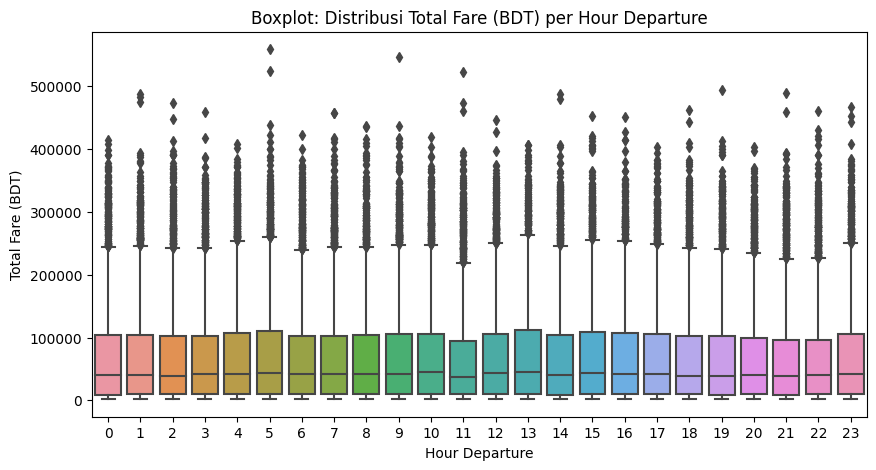

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour_dep', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Hour Departure")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Hour Departure")
plt.show()

Insight: `hour_dep` at 5 have highest outlier `Total Fare (BDT)` and `hour_dep` at 13 have upper quirtile highest

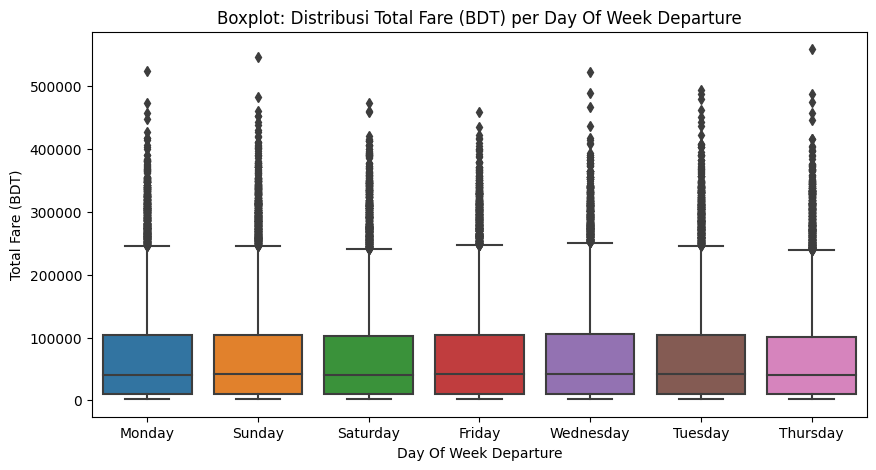

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='dow_dep', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Day Of Week Departure")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Day Of Week Departure")
plt.show()

Insight: `dow_dep` type Thursday have highest outlier `TotalFare (BDT)`

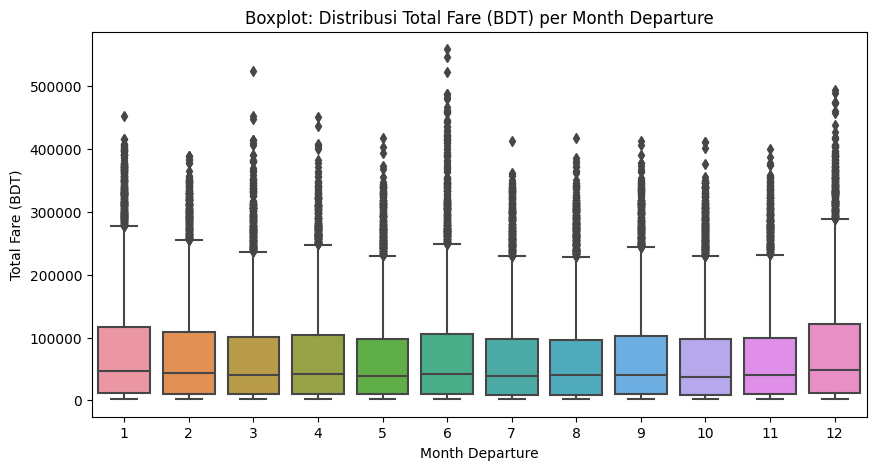

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='month_dep', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Month Departure")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Month Departure")
plt.show()

Insight: `month_dep` type 12 have median and upper quirtile `Total Fare (BDT)` highest, `month_dep` type 6 have highets outliers `Total Fare (BDT)`

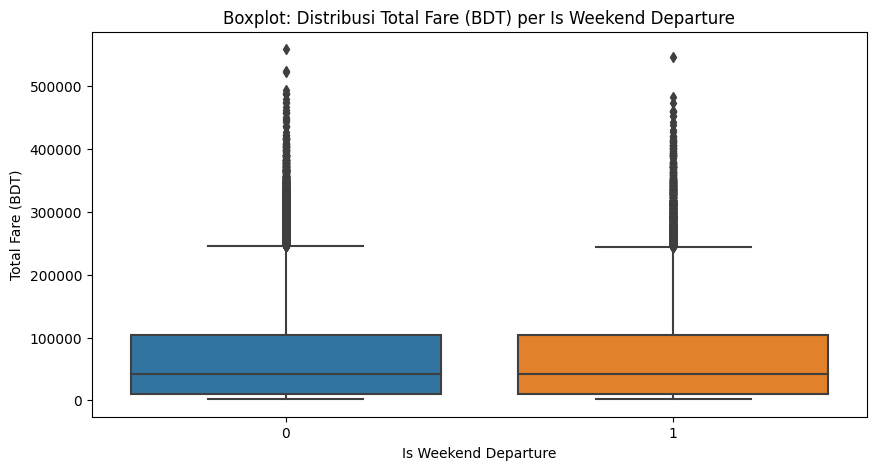

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_weekend_dep', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Is Weekend Departure")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Is Weekend Departure")
plt.show()

Insight: `is_wekend_dep` type 0 or not weekend have outlier `Total Fare (BDT)` highest

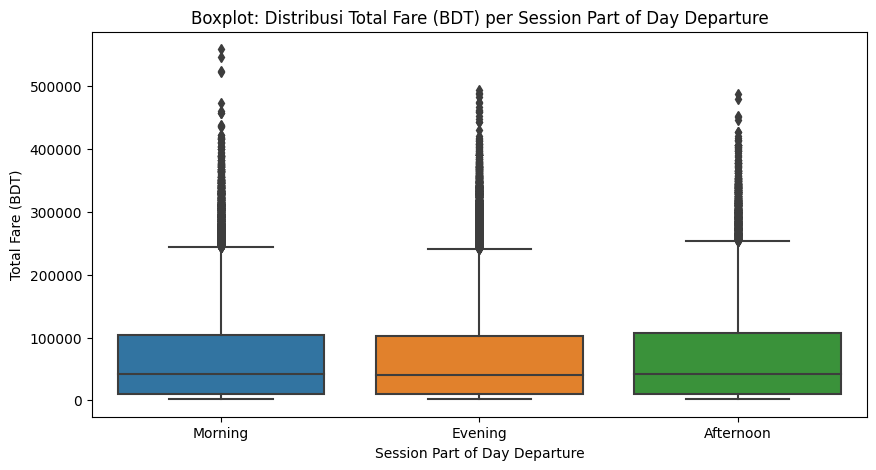

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='session_part_of_day_dep', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Session Part of Day Departure")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Session Part of Day Departure")
plt.show()

Insight: `session_part_of_day_dep` type Morning have highest outlier `Total Fare (BDT)` and `session_part_of_day_dep` type Afternoon have highest upper quirtile

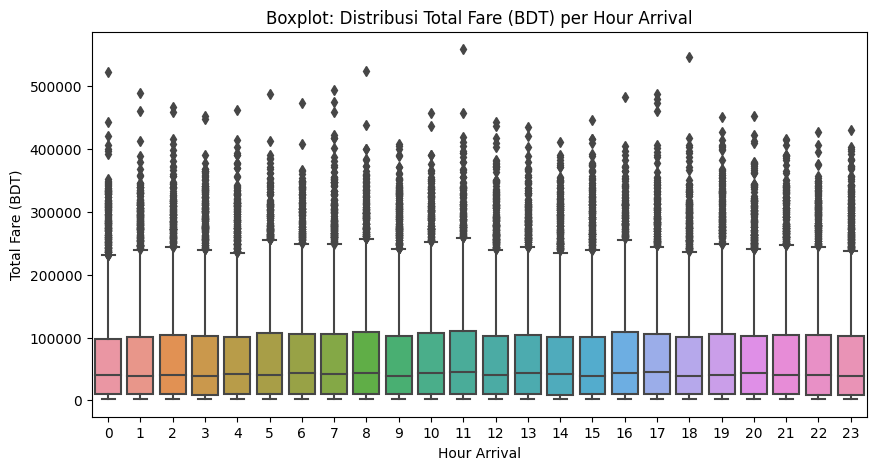

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour_arr', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Hour Arrival")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Hour Arrival")
plt.show()

Insight: `hour_arr` at 11 have highest outlier and upper quirtile `Total Fare (BDT)`

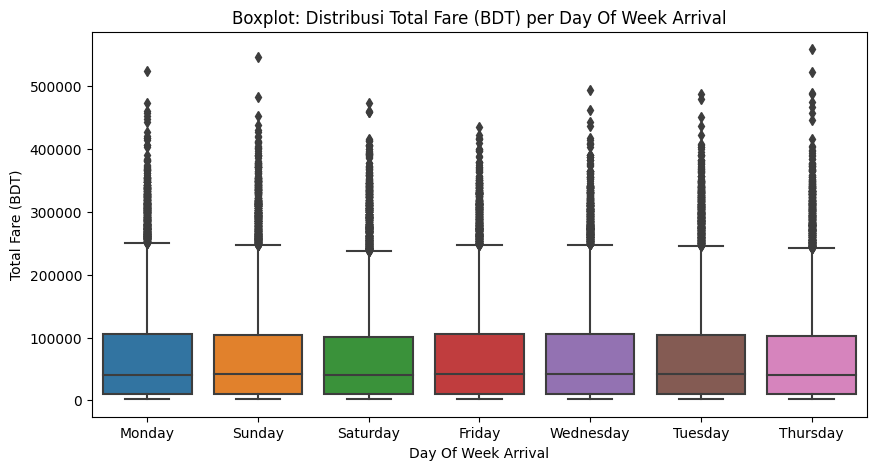

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='dow_arr', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Day Of Week Arrival")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Day Of Week Arrival")
plt.show()

Insight: `dow_arr` type Thursday have highest outlier `TotalFare (BDT)`

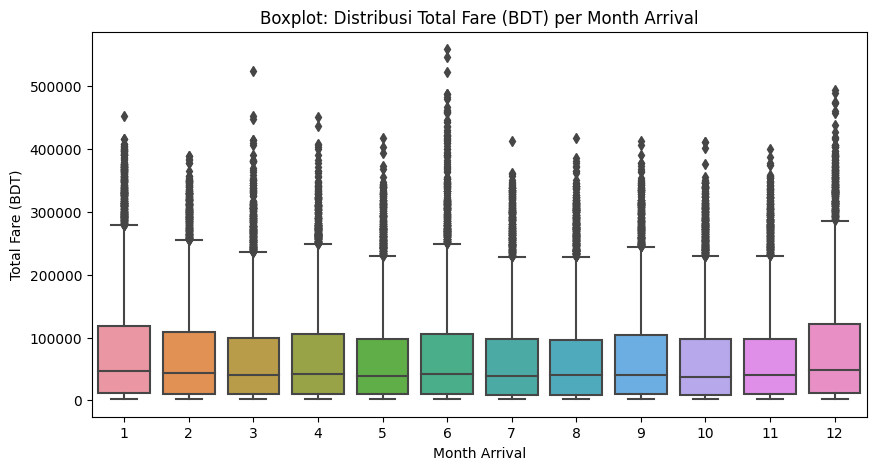

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='month_arr', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Month Arrival")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Month Arrival")
plt.show()

Insight: `month_arr` type 12 have median and upper quirtile `Total Fare (BDT)` highest, `month_dep` type 6 have highets outliers `Total Fare (BDT)`

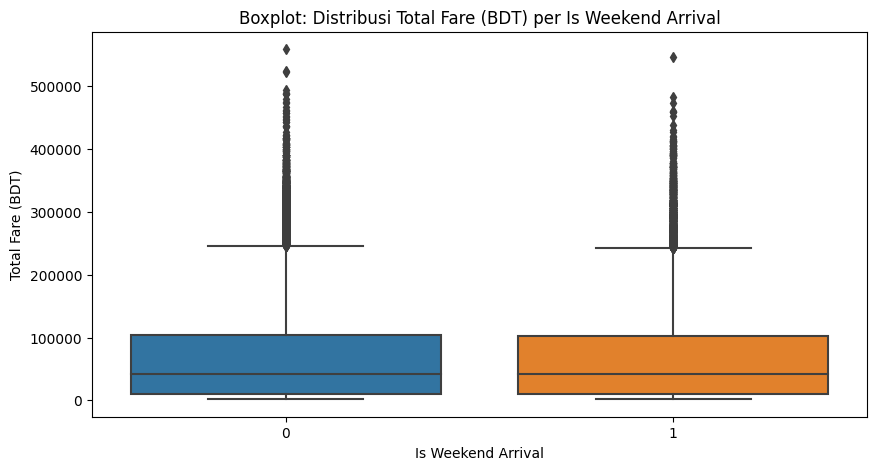

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_weekend_arr', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Is Weekend Arrival")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Is Weekend Arrival")
plt.show()

Insight: `is_wekend_arr` type 0 or not weekend have outlier `Total Fare (BDT)` highest

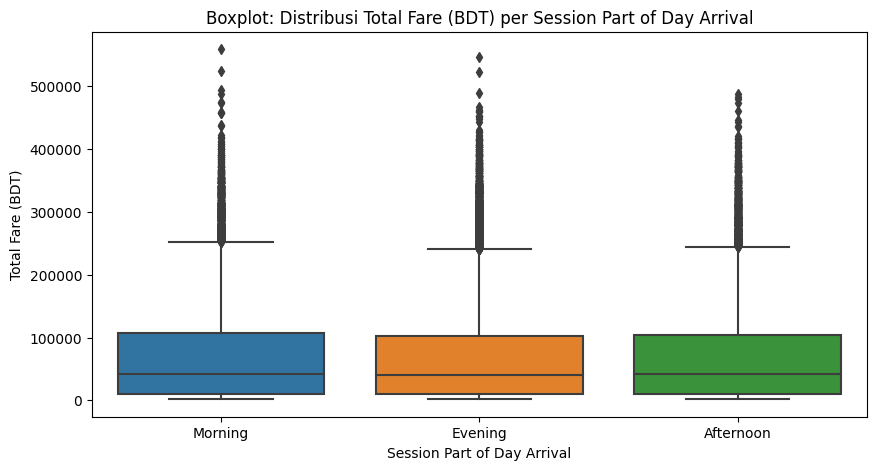

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='session_part_of_day_arr', y='Total Fare (BDT)', data=flight)
plt.title("Boxplot: Distribusi Total Fare (BDT) per Session Part of Day Arrival")
plt.ylabel("Total Fare (BDT)")
plt.xlabel("Session Part of Day Arrival")
plt.show()

Insight: `session_part_of_day_dep` type Morning have highest outlier and upper qurtile `Total Fare (BDT)`

## Preparation Data

Make Final data before modeling created, all data must be clean

In [30]:
flight_clean = flight.drop(['Source', 'Destination', 
                            'Departure Date & Time', 'Arrival Date & Time'], axis=1)

label Encoder

In [31]:
# Identify categorical columns
categorical_cols = flight_clean.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in categorical_cols:
    flight_clean[col] = label_encoder.fit_transform(flight_clean[col])

Sparate target and feature

In [32]:
x = flight_clean.drop(['Total Fare (BDT)'], axis=1)
y = flight_clean['Total Fare (BDT)']

## Cross Validation

K-Fold Cross-Validation splits the dataset into multiple folds, training the model on different subsets and testing on unseen data. This technique minimizes overfitting and provides a comprehensive evaluation of model performance. By leveraging Python’s scikit-learn, we ensure that our model is both robust and generalizes well to new data

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

## Modeling

In this phase, we develop and fine-tune machine learning models using powerful algorithms like Random Forest, Light GBM, XGBoost and Deep Learning. With Python’s scikit-learn and other ML libraries, we train models, optimize hyperparameters, and evaluate their performance. The goal: a model that balances accuracy, precision, and recall to deliver actionable insights

### Random Forest

A Random Forest Regressor is a machine learning algorithm that belongs to the ensemble learning family. It is used for regression tasks, meaning it predicts continuous values

In [34]:
# Define objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    
    model = RandomForestRegressor(random_state=111, **params)
    
    # Cross-validation use MAPE
    kf = KFold(n_splits=5, shuffle=True, random_state=111)
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring=mape_scorer)
    
    return cv_scores.mean()  

# Run Optuna optimization
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=20)

# Best parameters from Optuna
best_params = study.best_params
print("Best Parameters:", best_params)

# Train final Random Forest model using the best parameters
rf_model = RandomForestRegressor(random_state=111, **best_params)
rf_model.fit(x_train, y_train)

[I 2025-03-18 05:53:30,979] A new study created in memory with name: no-name-2f901a27-c479-4334-84fd-7b975cbbe5fd
[I 2025-03-18 06:00:35,623] Trial 0 finished with value: -0.0009263272941159428 and parameters: {'n_estimators': 268, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: -0.0009263272941159428.
[I 2025-03-18 06:02:20,742] Trial 1 finished with value: -0.042436580820959705 and parameters: {'n_estimators': 431, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: -0.0009263272941159428.
[I 2025-03-18 06:05:13,486] Trial 2 finished with value: -0.009975435865071037 and parameters: {'n_estimators': 453, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.0009263272941159428.
[I 2025-03-18 06:05:27,797] Trial 3 finished with value: -0.26877181906545405 and parameters: {'n_estimators': 11

Best Parameters: {'n_estimators': 350, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}


RandomForestRegressor(max_depth=17, max_features=None, n_estimators=350,
                      random_state=111)

In [35]:
# Predict and Evaluate MAPE
y_pred_rf = rf_model.predict(x_val)
mape_score_rf = mean_absolute_percentage_error(y_val, y_pred_rf)

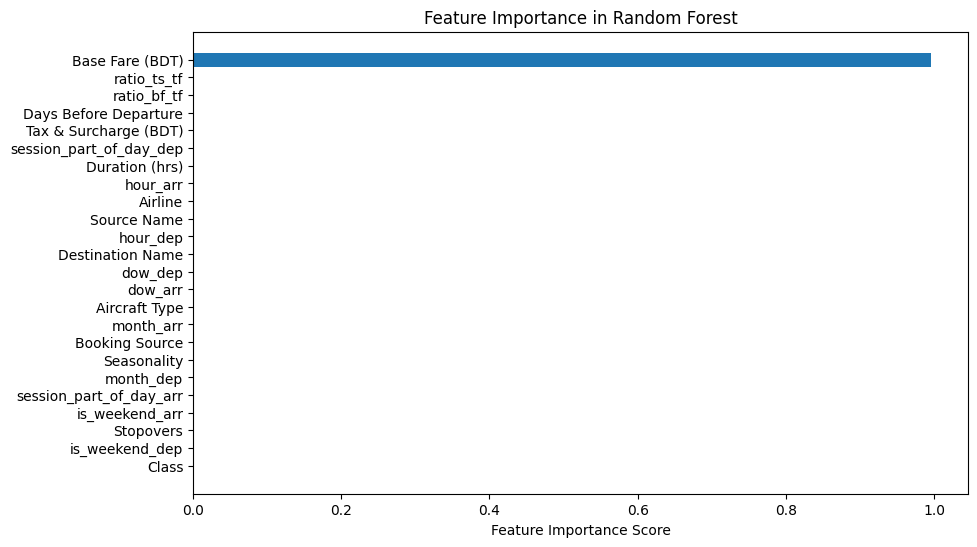

In [36]:
# 🔥 FEATURE IMPORTANCE PLOT 🔥
feature_importances_rf = rf_model.feature_importances_
feature_names_rf = x.columns
sorted_idx = np.argsort(feature_importances_rf)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances_rf[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names_rf)[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()

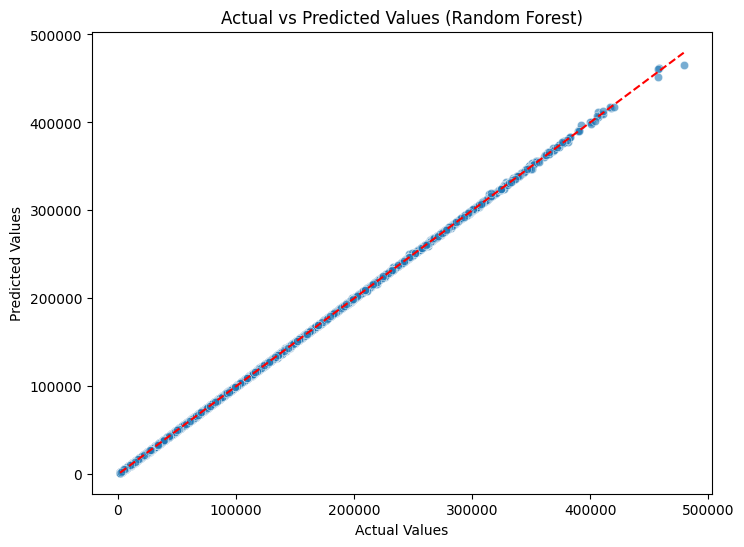

In [37]:
# 📊 Plot Result Prediction vs Actual 📊
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_rf, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()

### XGBoost

XGBoost Regressor (Extreme Gradient Boosting Regressor) is a powerful and efficient machine learning algorithm designed for regression tasks (predicting continuous values). It is an improved version of gradient boosting that is optimized for speed and performance

In [38]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.01),
        'n_estimators': trial.suggest_int('n_estimators', 400, 800),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
    }
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror',  # Regression objective
        eval_metric='mape',  # Mean Absolute Percentage Error
        random_state=111,
        **params
    )
    
    # Use K-Fold Cross Validation
    kf = KFold(n_splits=7, shuffle=True, random_state=111)
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)  # MAPE scorer
    
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring=mape_scorer)  # MAPE as metric
    
    return cv_scores.mean()  # Mean MAPE as the optimization metric

# Run Optuna hyperparameter optimization
study = optuna.create_study(direction='maximize')  # Minimizing MAPE (maximize negative MAPE)
study.optimize(objective, n_trials=15)

# Best parameters found by Optuna
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model using the best parameters
optuna_model_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='mape',
    random_state=111,
    **best_params
)

optuna_model_xgb.fit(x_train, y_train)

[I 2025-03-18 08:13:45,390] A new study created in memory with name: no-name-3493fc72-04d2-49f8-8653-5e7057a1fdc4
[I 2025-03-18 08:14:05,734] Trial 0 finished with value: -0.0077910925950961316 and parameters: {'max_depth': 6, 'learning_rate': 0.009094773536963956, 'n_estimators': 766, 'subsample': 0.8591917872843575, 'colsample_bytree': 0.7594245836388016}. Best is trial 0 with value: -0.0077910925950961316.
[I 2025-03-18 08:14:34,408] Trial 1 finished with value: -0.8581696616548454 and parameters: {'max_depth': 7, 'learning_rate': 0.002296453092026669, 'n_estimators': 751, 'subsample': 0.7570641881618108, 'colsample_bytree': 0.9541389770087724}. Best is trial 0 with value: -0.0077910925950961316.
[I 2025-03-18 08:15:03,595] Trial 2 finished with value: -0.012952865160522676 and parameters: {'max_depth': 8, 'learning_rate': 0.009632918003995301, 'n_estimators': 625, 'subsample': 0.7063227710179222, 'colsample_bytree': 0.8436885701497374}. Best is trial 0 with value: -0.00779109259509

Best Parameters: {'max_depth': 9, 'learning_rate': 0.009892612228824657, 'n_estimators': 701, 'subsample': 0.8350387885518192, 'colsample_bytree': 0.8858936956425653}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8858936956425653, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mape', feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009892612228824657,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=701, n_jobs=None,
             num_parallel_tree=None, random_state=111, ...)

In [39]:
y_pred_xgb = optuna_model_xgb.predict(x_val)
mape_score_xgb = mean_absolute_percentage_error(y_val, y_pred_xgb)

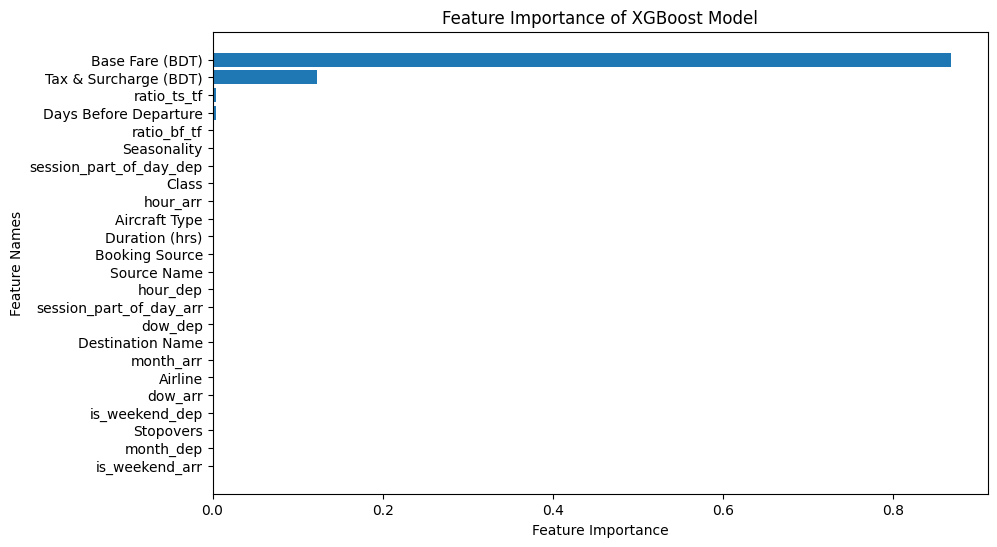

In [40]:
importance_xgb = pd.DataFrame({
    'Feature': x.columns,
    'Importance': optuna_model_xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_xgb['Feature'], importance_xgb['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance of XGBoost Model")
plt.gca().invert_yaxis()  # Invert to show most important feature at the top
plt.show()

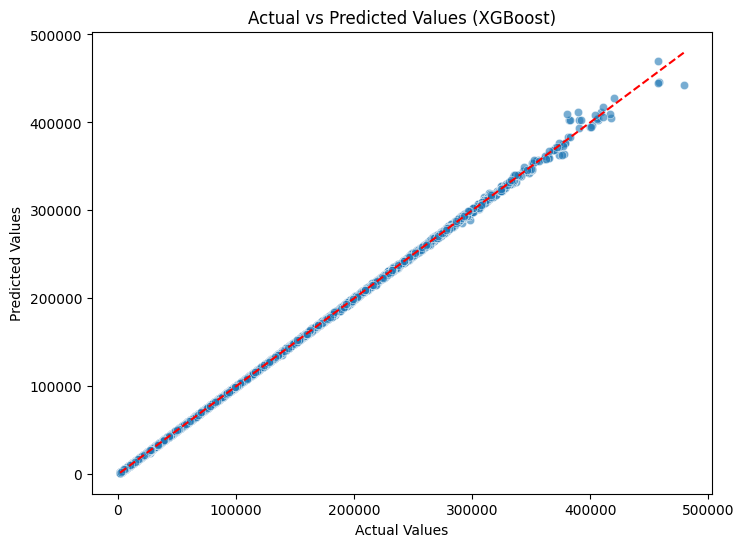

In [41]:
# 📊 Plot Result Prediction vs Actual 📊
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_xgb, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost)")
plt.show()

### Light GBM

LightGBM Regressor is a gradient boosting framework developed by Microsoft that is optimized for efficiency and speed. It is designed for large datasets and provides high-performance modeling with lower memory usage

In [ ]:
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }
  
     

    model = lgb.LGBMRegressor(**params, random_state=42)
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    return -scores.mean()

study = optuna.create_study(direction='minimize')  # Minimize MAPE
study.optimize(objective, n_trials=15)

# Get best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

optuna_lgbm = lgb.LGBMRegressor(**best_params, random_state=42)
optuna_lgbm.fit(x_train, y_train)

NameError: name 'optuna' is not defined

In [1]:
y_pred_lgbm = optuna_lgbm.predict(x_val)
mape_score_lgbm = mean_absolute_percentage_error(y_val, y_pred_lgbm)


KeyboardInterrupt



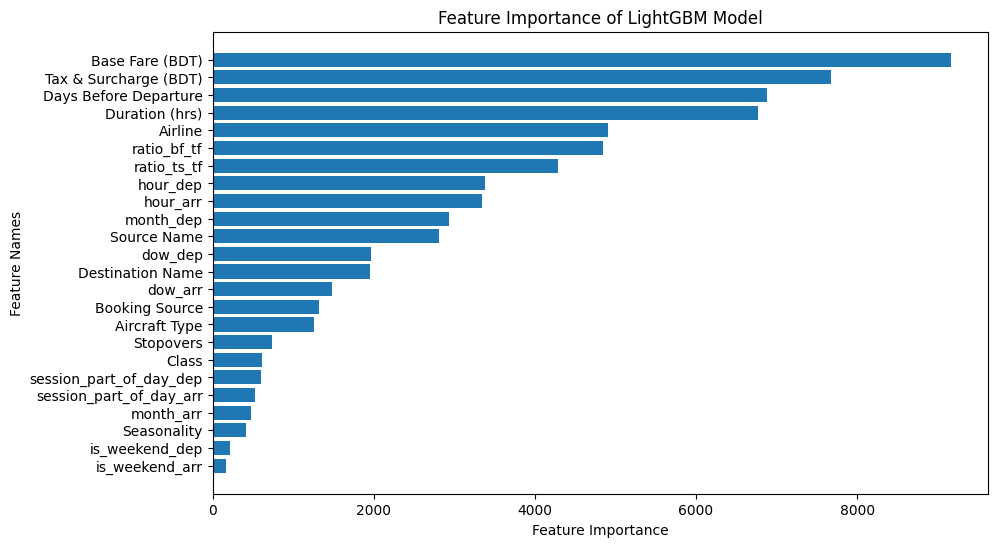

In [44]:
feature_importance_lgbm = pd.DataFrame({
    'Feature': x.columns,
    'Importance': optuna_lgbm.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lgbm['Feature'], feature_importance_lgbm['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance of LightGBM Model")
plt.gca().invert_yaxis()
plt.show()

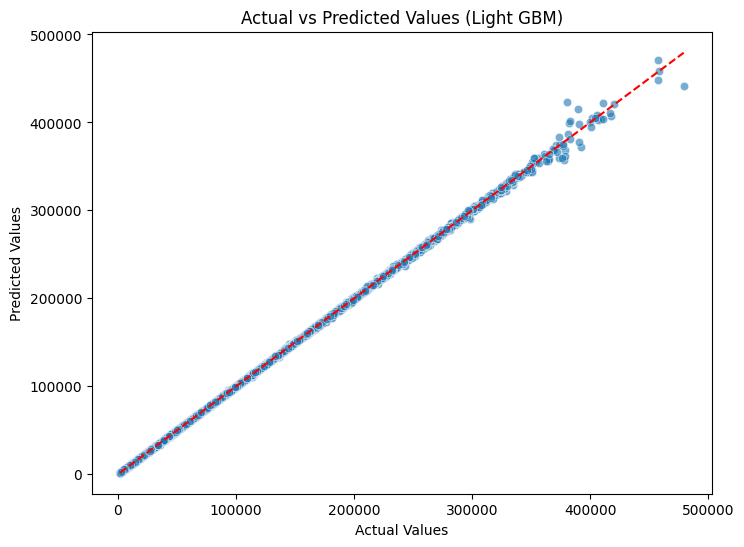

In [45]:
# 📊 Plot Result Prediction vs Actual 📊
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_lgbm, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Light GBM)")
plt.show()

## Evaluation

In [46]:
print(f"Mean Absolute Percentage Error (MAPE) Random Forest: {mape_score_rf * 100:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE) XGBoost: {mape_score_xgb * 100:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE) Light GBM: {mape_score_lgbm * 100:.2f}%")

Mean Absolute Percentage Error (MAPE) Random Forest: 0.05%
Mean Absolute Percentage Error (MAPE) XGBoost: 0.61%
Mean Absolute Percentage Error (MAPE) Light GBM: 0.37%


## Conclusion

Highest feature importance from 3 model is `Base Fare (BDT)` and model machine learning recomended is Random Forest with smallest MAPE 0.05%

## Reference

1. https://scikit-learn.org/stable/
2. https://xgboost.readthedocs.io/en/stable/
3. https://lightgbm.readthedocs.io/en/stable/

## Contact

[Linkedin](http://linkedin.com/in/muh-amri-sidiq)